# $\tau$-scaling
---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# from numba import njit
import palettable as pl
emr = pl.cartocolors.sequential.Emrld_7_r.get_mpl_colormap()
plt.style.use('Solarize_Light2')
from time import time

In [5]:
from mon_jasnow import get_tau_scaling, get_tau, tau_at_tc

In [6]:
Tc = 2 /(np.log(1+np.sqrt(2)))

In [7]:
N_list =np.arange(16, 200, 16)
N_points =20
T = np.linspace(0.8*Tc, Tc, N_points)
N_sweeps = 20000
N_runs = 1
skips = 3

In [7]:
# a0 = time()
# for N in N_list:
#     a = time()
#     tau = get_tau(N, N_sweeps, T, N_runs, skips, bc='torus')
#     b = time()
#     np.save(f"tau/N{N}_Sweeps{N_sweeps}_skips{skips}", [tau, T])
#     print(f"N: {N}")
#     print(f"Time for current: {b-a}s")
#     print(f"Total time: {b-a0}s")

C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


N: 16
Time for current: 33.45275521278381s
Total time: 33.45275521278381s
N: 32
Time for current: 107.8376157283783s
Total time: 141.2923777103424s
N: 48
Time for current: 248.9586865901947s
Total time: 390.2550537586212s
N: 64
Time for current: 433.82244324684143s
Total time: 824.0794920921326s
N: 80
Time for current: 753.5726735591888s
Total time: 1577.6541495323181s
N: 96
Time for current: 1045.452730178833s
Total time: 2623.1088740825653s
N: 112
Time for current: 1457.1254014968872s
Total time: 4080.2372682094574s
N: 128
Time for current: 1906.2511229515076s
Total time: 5986.491372585297s
N: 144
Time for current: 2729.6811847686768s
Total time: 8716.175549268723s
N: 160
Time for current: 3164.066665649414s
Total time: 11880.25120472908s
N: 176
Time for current: 3518.0718891620636s
Total time: 15398.330047607422s
N: 192
Time for current: 4094.2565014362335s
Total time: 19492.58950638771s


In [5]:
plt.scatter(T/Tc, tau)
plt.ylim(0,1.7)

NameError: name 'tau' is not defined

In [6]:
matrix = np.zeros((N_list.shape[0], T.shape[0]))

In [7]:
for i,N in enumerate(N_list):
    tau, _ = np.load(f"tau/N{N}_Sweeps{N_sweeps}_skips{skips}.npy", allow_pickle=True)
    matrix[i,:] = tau

In [ ]:
# %time tau_scaling = get_tau_scaling(N_list, T, N_sweeps, N_runs, skips)
# np.save(f"tau/scaling_Sweeps{N_sweeps}_skips{skips}", [tau_scaling, N_list, T])

In [8]:
X,Y  = np.meshgrid(N_list, T)

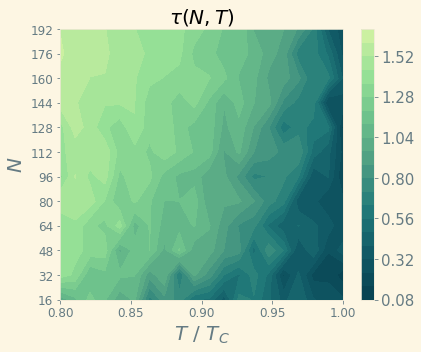

In [9]:
fig = plt.figure(figsize=(6,5), tight_layout=True)
p = plt.contourf(Y/Tc, X, matrix.T, cmap=emr, levels=20)
cbar = plt.colorbar(p)
plt.yticks(N_list, N_list, size=12)
plt.xticks([0.8, 0.85, 0.9, 0.95, 1],size=12)
plt.ylabel(fr"$N$", fontsize=20)
plt.xlabel(fr"$T\ /\ T_C$", fontsize=20)
plt.title(fr"$\tau(N, T)$", size=20)
# fig.tight_layout()
cbar.ax.tick_params(labelsize=15) 
plt.show()


In [10]:
for i,tau in enumerate(tau_scaling):
    plt.scatter(T/Tc, tau, label =f"N: {N_list[i]}")
plt.legend()
plt.show()


NameError: name 'tau_scaling' is not defined

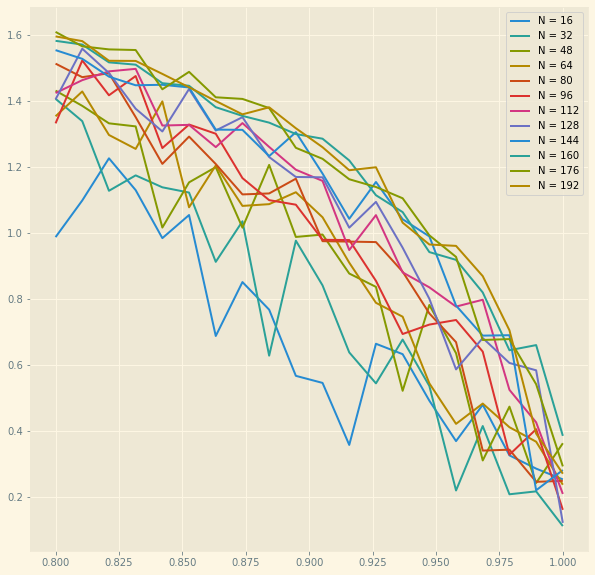

In [11]:
plt.figure(figsize=(10,10))
for i, N in enumerate(N_list):
    plt.plot(T/Tc, matrix[i], label =f"N = {N}")
plt.legend()

# At $T = T_C$

---

In [129]:
# tau_tc = matrix[:,-1]
# tau_tc

In [16]:
from dask import delayed, compute
import matplotlib

In [12]:
n = np.arange(10, 201, 10, dtype=int)

In [13]:
N_sweeps = 100000
tau_tc = tau_at_tc(n, N_sweeps)

Total time: 8316.221781015396s


In [18]:
# np.save(f"tau/tau_tc_N_sweeps{N_sweeps}_Nruns{N_runs}", [tau_tc, n])

In [14]:
# tau_tc, n = np.load("tau/tau_tc_N_sweeps100000_Nruns1.npy", allow_pickle=True)
tau_tc = np.array([t[0] for t in tau_tc])
n = n.astype(int)

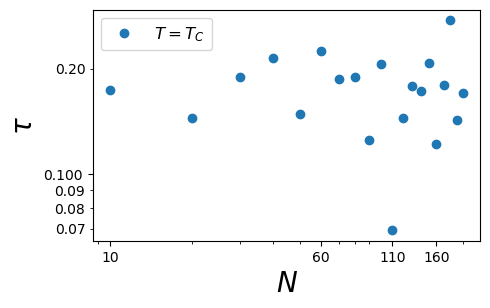

In [24]:
lab = np.linspace(n.min(), n.max(), 5, dtype=int)
plt.figure(figsize = (5,3))
plt.style.use('default')
plt.loglog(n, tau_tc,'o', label = fr"$T = T_C$")
# plt.loglog(n,4/n, '--', label='Analytic slope')
# plt.loglog(n, 5/n)
plt.legend(fontsize=12)
plt.xticks(n[::5], n[::5])
# plt.yticks([1/2**3, 0.25, 0.5, 1], [1/2**3,0.25,0.5, 1])
# plt.yticks([0.25, 0.5,1, ], [0.25, 0.5,1, ])
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# plt.gca().get_xaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())

plt.ylabel(fr"$\tau$", size=20)
plt.xlabel(fr"$N$", size=20)
# plt.yticks(ta)
plt.show()